<a href="https://colab.research.google.com/github/suhail04-md/Airlines-Flight-Data-Analysis/blob/main/Airline_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv("/content/airlines_flights_data.csv")

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
 12  Unnamed: 12       0 non-null       float64
 13  Unnamed: 13       0 non-null       float64
dtypes: float64(3), int64(3), object(8)
memory usage: 32.1+ MB


In [122]:
df.isnull().sum()
df.fillna(True)

/tmp/ipython-input-740124067.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(True)


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Unnamed: 12,Unnamed: 13
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,True,True
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,True,True
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,True,True
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,True,True
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,True,True
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,True,True
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,True,True
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,True,True


In [123]:
#1
df.groupby("airline")["price"].mean().sort_values()

,price
airline,
AirAsia,4091.072742
Indigo,5324.216303
GO_FIRST,5652.007595
SpiceJet,6179.278881
Air_India,23507.019112
Vistara,30396.536302


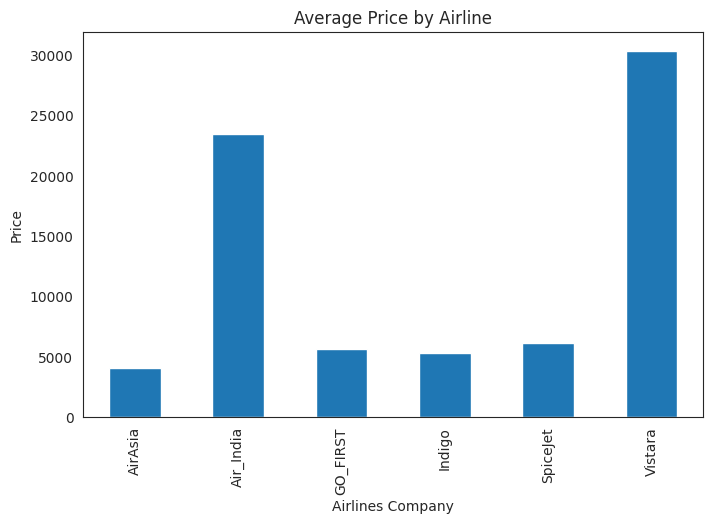

In [124]:
#visualization
plt.figure(figsize=(8,5))
df.groupby("airline")["price"].mean().plot(kind="bar")

plt.title("Average Price by Airline")
plt.xlabel("Airlines Company")
plt.ylabel("Price")
plt.show()


In [125]:
#2
days_price = df.groupby("days_left")["price"].mean().reset_index()
days_price = days_price.sort_values("days_left")
days_price.head()

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


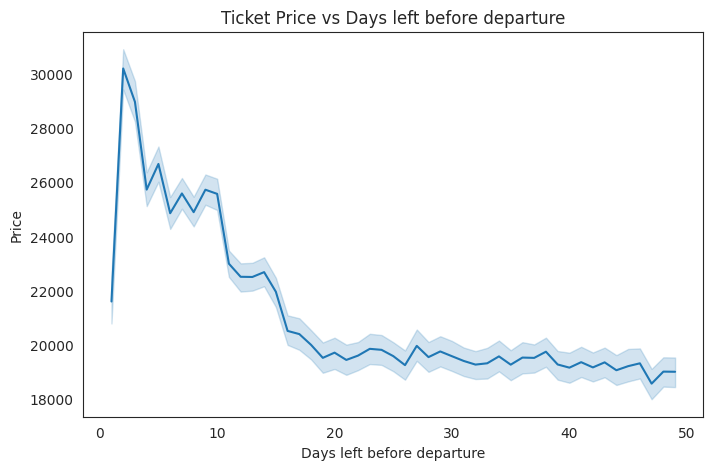

In [126]:
#visualization
plt.figure(figsize=(8,5))
sns.lineplot(x="days_left",y="price",data=df)
plt.xlabel("Days left before departure")
plt.ylabel("Price")
plt.title("Ticket Price vs Days left before departure")
plt.show()

In [127]:
#3
df.groupby(["source_city","destination_city"])["price"].mean()

source_city  destination_city
Bangalore    Chennai             23321.850078
             Delhi               17723.313972
             Hyderabad           21226.121192
             Kolkata             23500.061229
             Mumbai              23128.618672
Chennai      Bangalore           25081.850454
             Delhi               18981.863948
             Hyderabad           21591.345404
             Kolkata             22669.932407
             Mumbai              22765.849647
Delhi        Bangalore           17880.216315
             Chennai             19369.881354
             Hyderabad           17347.288379
             Kolkata             20566.409418
             Mumbai              19355.829812
Hyderabad    Bangalore           21347.177998
             Chennai             21848.065989
             Delhi               17243.945685
             Kolkata             20823.893201
             Mumbai              20080.865759
Kolkata      Bangalore           22744.808428
             Chennai             23660.361040
             Delhi               19422.354559
             Hyderabad           21500.011397
             Mumbai              22078.883579
Mumbai       Bangalore           23147.873807
             Chennai             22781.899112
             Delhi               18725.320008
             Hyderabad           21004.046705
             Kolkata             22379.146723
Name: price, dtype: float64

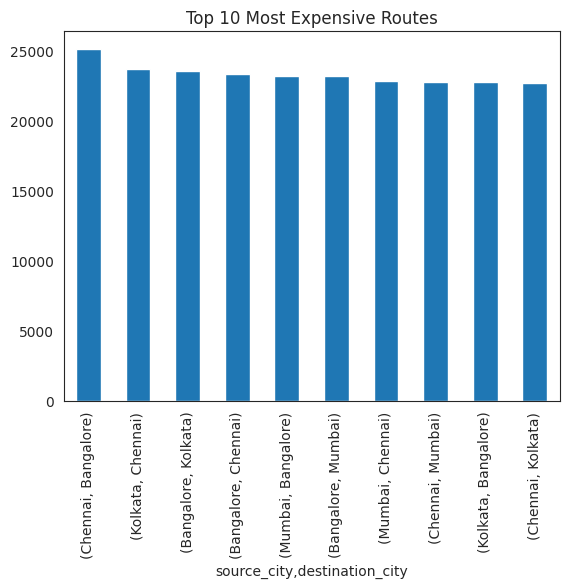

In [128]:
#visualization
df.groupby(["source_city","destination_city"])["price"].mean() \
  .sort_values(ascending=False).head(10) \
  .plot(kind="bar")

plt.title("Top 10 Most Expensive Routes")
plt.show()


In [129]:
#4
df.groupby("class")["price"].mean()

,price
class,
Business,52540.081124
Economy,6572.342383


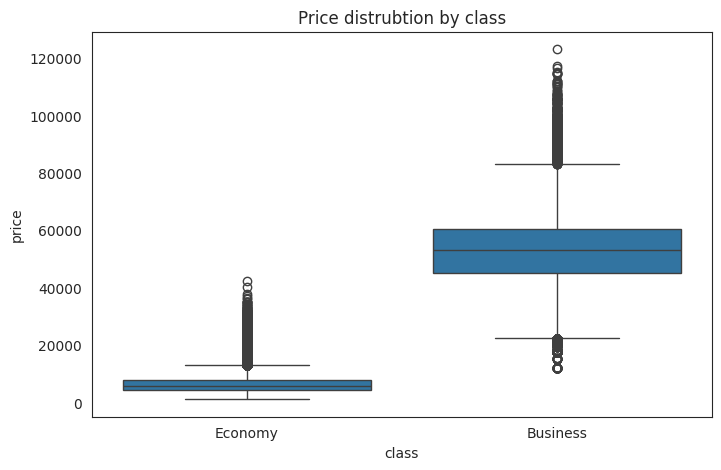

In [130]:
#Visualization
plt.figure(figsize=(8,5))
sns.boxplot(x="class",y="price",data=df)
plt.xlabel("class")
plt.ylabel("price")
plt.title("Price distrubtion by class")
plt.show()

In [131]:
#5
df.groupby("departure_time")["price"].mean()

,price
departure_time,
Afternoon,18179.203331
Early_Morning,20370.676718
Evening,21232.361894
Late_Night,9295.299387
Morning,21630.760254
Night,23062.146808


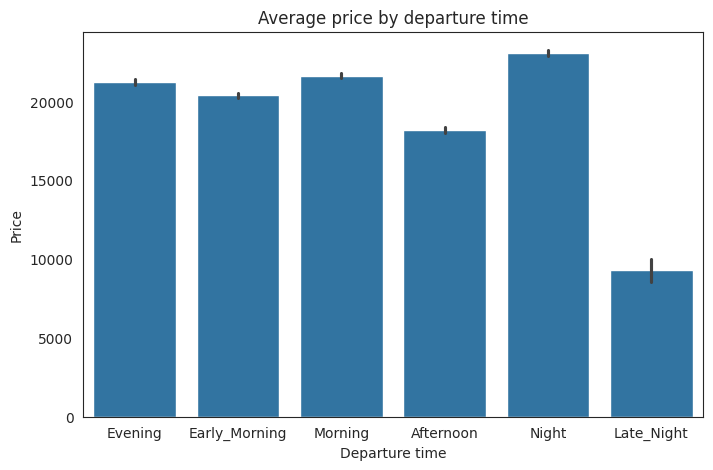

In [132]:
#Visualization
plt.figure(figsize=(8,5))
sns.barplot(x="departure_time", y="price", data=df, estimator=np.mean)
plt.title("Average price by departure time")
plt.xlabel("Departure time")
plt.ylabel("Price")
plt.show()

In [133]:
#6
df.groupby("airline")["price"].std()

,price
airline,
AirAsia,2824.055172
Air_India,20905.116909
GO_FIRST,2513.865560
Indigo,3268.894831
SpiceJet,2999.630406
Vistara,25637.159445


In [134]:
#7
df.groupby("source_city")["duration"].mean()

,duration
source_city,
Bangalore,12.029203
Chennai,12.838901
Delhi,11.515499
Hyderabad,12.268075
Kolkata,13.249898
Mumbai,11.888448


In [135]:
#8
df.groupby("stops")["price"].mean()

,price
stops,
one,22900.992482
two_or_more,14113.450775
zero,9375.938535


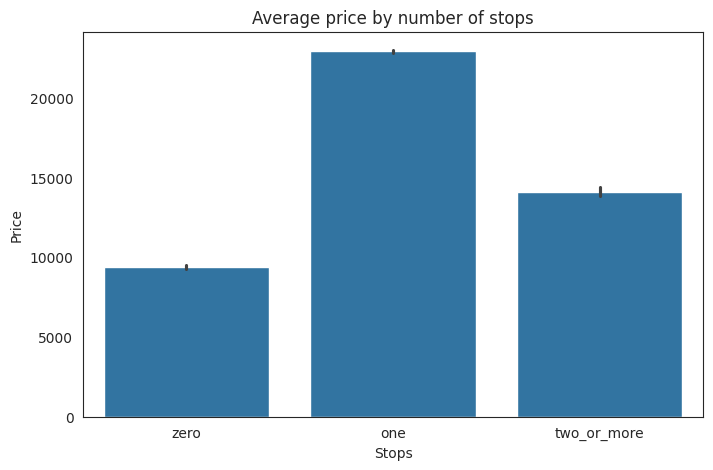

In [136]:
#visualization
plt.figure(figsize=(8,5))
sns.barplot(x="stops", y="price", data=df, estimator=np.mean)
plt.title("Average price by number of stops")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show()

In [137]:
#9
df[["duration","price"]].corr()

,duration,price
duration,1.000000,0.204222
price,0.204222,1.000000


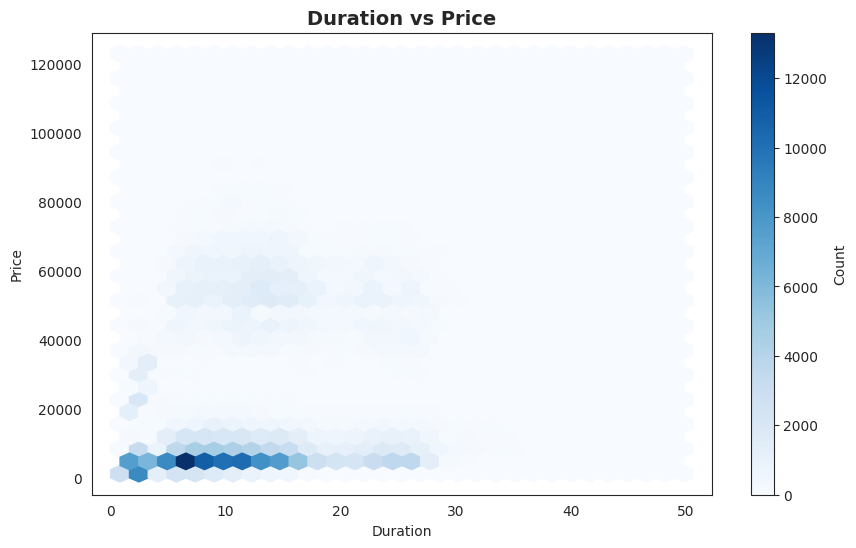

In [138]:
#visualization
plt.figure(figsize=(10, 6))
plt.hexbin(df['duration'], df['price'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Duration vs Price", fontsize=14, fontweight='bold')
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

In [139]:
#10
df.groupby("destination_city")["price"].mean()

,price
destination_city,
Bangalore,21593.955784
Chennai,21953.323969
Delhi,18436.767870
Hyderabad,20427.661284
Kolkata,21959.557556
Mumbai,21372.529469


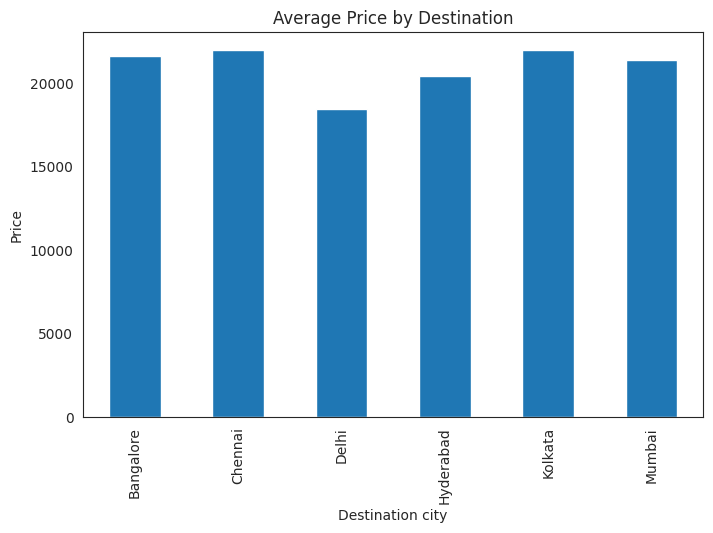

In [140]:
#visualization
plt.figure(figsize=(8,5))
df.groupby("destination_city")["price"].mean().plot(kind="bar")

plt.title("Average Price by Destination")
plt.xlabel("Destination city")
plt.ylabel("Price")
plt.show()


In [141]:
#11
df.groupby("arrival_time")["price"].mean()

,price
arrival_time,
Afternoon,18494.598993
Early_Morning,14993.139521
Evening,23044.371615
Late_Night,11284.906078
Morning,22231.076098
Night,21586.758341


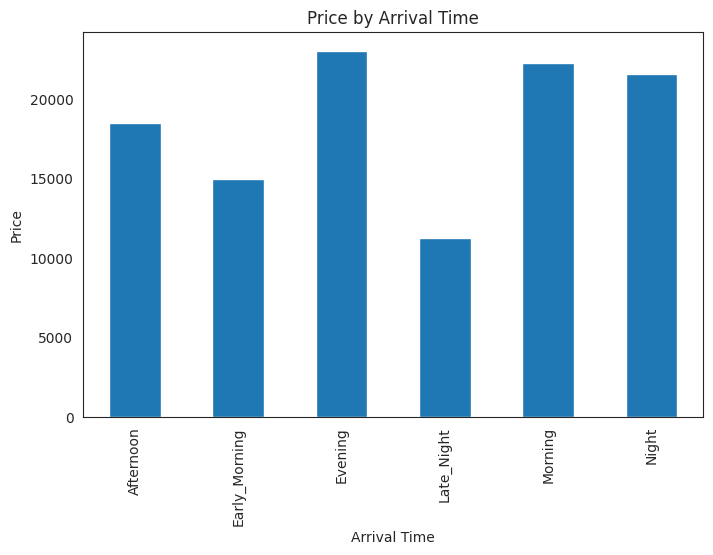

In [142]:
#visualization
plt.figure(figsize=(8,5))
df.groupby("arrival_time")["price"].mean().plot(kind="bar")

plt.title("Price by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Price")
plt.show()

In [143]:
#12
df[df["class"]=="Business"].groupby("airline")["price"].sum()

,price
airline,
Air_India,1550516928
Vistara,3361297636


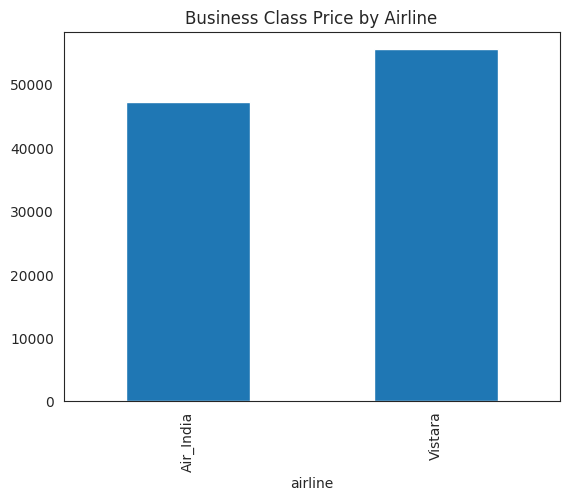

In [144]:
#visualization
df[df["class"]=="Business"] \
  .groupby("airline")["price"].mean() \
  .plot(kind="bar")

plt.title("Business Class Price by Airline")
plt.show()

In [145]:
#13
df[df["class"]=="Business"]["airline"].value_counts()

,count
airline,
Vistara,60589
Air_India,32898


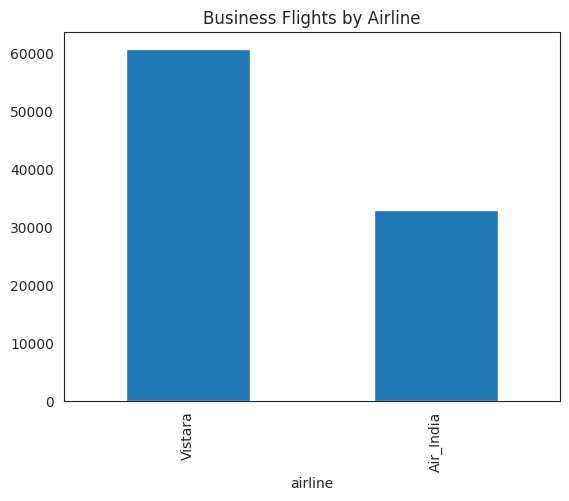

In [146]:
#visualization
df[df["class"]=="Business"]["airline"].value_counts().plot(kind="bar")

plt.title("Business Flights by Airline")
plt.show()


In [147]:
#14
df.groupby(["source_city","destination_city"])["price"].std()

source_city  destination_city
Bangalore    Chennai             22573.185689
             Delhi               19746.484106
             Hyderabad           21886.188883
             Kolkata             24631.108723
             Mumbai              25887.684502
Chennai      Bangalore           23405.422526
             Delhi               21946.879653
             Hyderabad           22866.927328
             Kolkata             23667.149966
             Mumbai              25118.401202
Delhi        Bangalore           19904.508234
             Chennai             22127.553940
             Hyderabad           18768.239479
             Kolkata             23655.844456
             Mumbai              19777.253580
Hyderabad    Bangalore           22195.170087
             Chennai             22527.946093
             Delhi               18548.644734
             Kolkata             22237.613504
             Mumbai              22638.104581
Kolkata      Bangalore           24130.762785
             Chennai             23371.419897
             Delhi               22693.238883
             Hyderabad           22690.671624
             Mumbai              23887.604966
Mumbai       Bangalore           25900.493645
             Chennai             24690.486578
             Delhi               19493.523862
             Hyderabad           22810.103011
             Kolkata             23998.184785
Name: price, dtype: float64

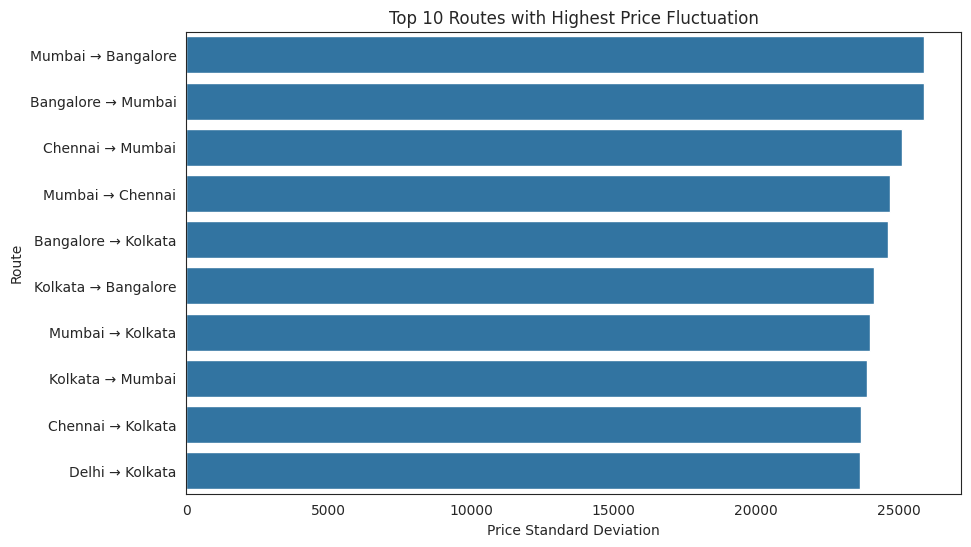

In [148]:
#visualization
route_std = df.groupby(["source_city","destination_city"])["price"].std().reset_index()

route_std["route"] = route_std["source_city"] + " → " + route_std["destination_city"]

top_routes = route_std.sort_values("price", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="price", y="route", data=top_routes)
plt.title("Top 10 Routes with Highest Price Fluctuation")
plt.xlabel("Price Standard Deviation")
plt.ylabel("Route")
plt.show()


In [149]:
#15
df.groupby(["source_city","destination_city","airline"]).size()

source_city  destination_city  airline  
Bangalore    Chennai           AirAsia       138
                               Air_India    1610
                               GO_FIRST      369
                               Indigo        282
                               SpiceJet       58
                                            ... 
Mumbai       Kolkata           Air_India    3478
                               GO_FIRST     1150
                               Indigo       1690
                               SpiceJet      973
                               Vistara      4848
Length: 177, dtype: int64

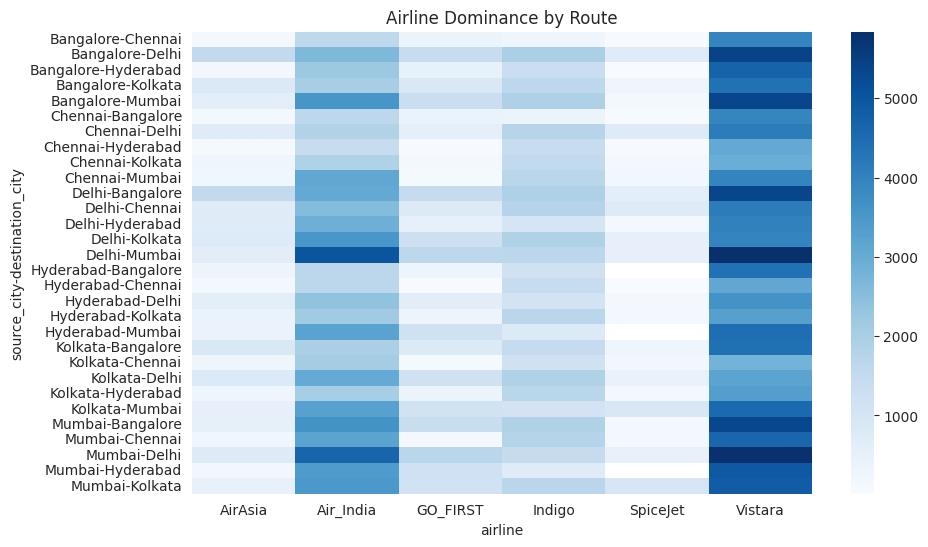

In [150]:
#visualization
route_airline = df.groupby(["source_city","destination_city","airline"]).size().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(route_airline, cmap="Blues")

plt.title("Airline Dominance by Route")
plt.show()
